In [2]:
%matplotlib inline
import numpy as np
from IPython.display import HTML, display
from matplotlib import pyplot as plt
from scipy.optimize import minimize, fmin
import math

# Instruction <span style="color:red">77 + 85 + 100 + 50 + 100 = 402 = 91%</span>

5 Problem 100 points each. Full score = 450.

Open book, open notes, open google, open stackoverflow, open exercise, open homework. No chat though.

All I ask is just don't abuse it.

Show your work so I can give partial credits.

In [12]:
score = 77 + 85 + 100 + 50 + 100
print score, score/450.0

412 0.915555555556


# 1. Cancer Classifier <span style="color:red">77</span>

Let us suppose a doctor wants to find a quick way to figure out whether a tumor is a cancerous or benign. So he collect the data of

- Volume (0:Small, 1:Medium, 2: Large)
- Color (0:Red, 1:Brown, 2:Black)
- Density (0:Light, 1:Dense)
- Lab Result (0:Benign, 1:Cancerous)

The data was collect only on those who passed preliminary screening test. The Data is given below.

<table>
<tr>
<td>No</td>
<td>Volume</td>
<td>Color</td>
<td>Density</td>
<td>Result</td>
</tr>
<tr>
<td>1</td>
<td>Large</td>
<td>Red</td>
<td>Light</td>
<td>Cancer</td>
</tr>
<tr>
<td>2</td>
<td>Large</td>
<td>Red</td>
<td>Dense</td>
<td>Benign</td>
</tr>
<tr>
<td>3</td>
<td>Medium</td>
<td>Red</td>
<td>Dense</td>
<td>Benign</td>
</tr>
<tr>
<td>4</td>
<td>Small</td>
<td>Red</td>
<td>Dense</td>
<td>Benign</td>
</tr>
<tr>
<td>5</td>
<td>Medium</td>
<td>Brown</td>
<td>Dense</td>
<td>Cancer</td>
</tr>
<tr>
<td>6</td>
<td>Large</td>
<td>Black</td>
<td>Dense</td>
<td>Benign</td>
</tr>
<tr>
<td>7</td>
<td>Medium</td>
<td>Brown</td>
<td>Dense</td>
<td>Cancer</td>
</tr>
<tr>
<td>8</td>
<td>Small</td>
<td>Red</td>
<td>Light</td>
<td>Cancer</td>
</tr>
<tr>
<td>9</td>
<td>Small</td>
<td>Black</td>
<td>Dense</td>
<td>Benign</td>
</tr>
<tr>
<td>10</td>
<td>Large</td>
<td>Red</td>
<td>Light</td>
<td>Benign</td>
</tr>
<tr>
<td>11</td>
<td>Large</td>
<td>Brown</td>
<td>Light</td>
<td>Cancer</td>
</tr>
<tr>
<td>12</td>
<td>Medium</td>
<td>Brown</td>
<td>Dense</td>
<td>Cancer</td>
</tr>
<tr>
<td>13</td>
<td>Small</td>
<td>Red</td>
<td>Dense</td>
<td>Cancer</td>
</tr>
<tr>
<td>14</td>
<td>Small</td>
<td>Red</td>
<td>Light</td>
<td>Cancer</td>
</tr>
<tr>
<td>15</td>
<td>Medium</td>
<td>Red</td>
<td>Dense</td>
<td>Benign</td>
</tr>
</table>

In [3]:
#for those of you who don't want to count by hands here is the data
data = [[1, 'Medium', 'Red', 'Dense', 'Benign'],
 [2, 'Large', 'Red', 'Light', 'Benign'],
 [3, 'Large', 'Red', 'Dense', 'Cancer'],
 [4, 'Large', 'Brown', 'Light', 'Cancer'],
 [5, 'Large', 'Red', 'Dense', 'Cancer'],
 [6, 'Small', 'Black', 'Dense', 'Benign'],
 [7, 'Small', 'Black', 'Dense', 'Cancer'],
 [8, 'Large', 'Brown', 'Light', 'Cancer'],
 [9, 'Medium', 'Red', 'Dense', 'Benign'],
 [10, 'Medium', 'Brown', 'Light', 'Cancer'],
 [11, 'Small', 'Brown', 'Light', 'Cancer'],
 [12, 'Small', 'Black', 'Light', 'Cancer'],
 [13, 'Large', 'Red', 'Dense', 'Benign'],
 [14, 'Small', 'Red', 'Light', 'Benign'],
 [15, 'Large', 'Red', 'Light', 'Benign']]

1) Find $P(Cancer | Red)$.
<span style="color:red">10</span>

In [4]:
def isRed(d):
    return d[2] == 'Red'
def isCancer(d):
    return d[4] == 'Cancer'

In [5]:
a = 0.
b = 0.
for d in data:
    if isRed(d):
        a += 1
        if isCancer(d):
            b += 1
print b/a

0.25


2) Find $P(Red | Cancer)$.
<span style="color:red">10</span>

In [6]:
a = 0.
b = 0.
for d in data:
    if isCancer(d):
        a += 1
        if isRed(d):
            b += 1
print b/a

0.25


3) Find $P(Red)$
<span style="color:red">10</span>

In [7]:
a = 0.
b = 0.
for d in data:
    a += 1
    if isRed(d):
        b += 1
print b/a

0.533333333333


4) Find $P(Cancer)$
<span style="color:red">10</span>

In [8]:
a = 0.
b = 0.
for d in data:
    a += 1
    if isCancer(d):
        b += 1
print b/a

0.533333333333


5) Suppose that we want to build a classifier to diagnose those patient that comes to the clinic and pass preliminary screening test. Which prior should we use and why?

<span style="color:red">0</span>

Due to the small sample size, 50/50 is a better prior

6) If we were to build a classifier to be use with *general population* whom are not necessarily pass the preliminary test, do we need to change the prior? Why?

<span style="color:red">0</span>

It would not be as accurate as there are features in those who passed preliminary test that general population may not have.

7) For condition given in 5) Use Bayes Classifier to find the probability that a Red, Large Dense Tumor is cancecerous. Show your work.

<span style="color:red">7</span> Wrong prior but already deducted

In [9]:
def isLarge(d):
    return d[1] == 'Large'
def isDense(d):
    return d[3] == 'Dense'

In [10]:
Rc = 0.
Lc = 0.
Dc = 0.
C = 0.

Rb = 0.
Lb = 0.
Db = 0.
B = 0.
for d in data:
    if isCancer(d):
        C += 1
        if isRed(d):
            Rc += 1
        if isLarge(d):
            Lc += 1
        if isDense(d):
            Dc += 1
    else:
        B += 1
        if isRed(d):
            Rb += 1
        if isLarge(d):
            Lb += 1
        if isDense(d):
            Db += 1        
print Rc, Lc, Dc, C
print Rb, Lb, Db, B

Pc = (Rc + Lc + Dc)/C
Pb = (Rb + Lb + Db)/B
print Pc, Pb

prior = 0.5

def calEvidence():
    return (Pc * prior) + (Pb * prior) #<<<<one of them should be 1-p
cE = calEvidence()

Prob = (Pc * prior)/cE
print "Probability  that a Red, Large Dense Tumor cancecerous is {0}%".format(Prob)

2.0 4.0 3.0 8.0
6.0 3.0 4.0 7.0
1.125 1.85714285714
Probability  that a Red, Large Dense Tumor cancecerous is 0.377245508982%


8) In picking a probability cutoff, which one should we avoid more false positive or false negative. (Positive=cancer) Why?

<span style="color:red">10</span>

We should try to avoid False Negative since it means risking the patient life on the line

9) Suppose the doctor go back and measure the radius of tumor(Small, Medium Large) as well. If we use Bayes Classifier, should we add radius as feature on top of what we have? Why?

<span style="color:red">10</span>

It makes more sense to replace the group sizes with radius rather than add it on top of what we have since they are basically the same thing. The only different is that radius is more insightful

# 2. Coding up Bayes <span style="color:red">85</span>

1 ) The data for situation in 1.5) is given in cancer.csv. The columns are the following

- Volume (0:Small, 1:Medium, 2: Large)
- Color (0:Red, 1:Brown, 2:Black)
- Density (0:Light, 1:Dense)
- Lab Result (0:Benign, 1:Cancerous)

Build Bayes classifier(you will need this for part 2) and find the probability that a Red, Large Dense Tumor is cancecerous.

<span style="color:red">35</span>


In [178]:
data = np.genfromtxt('cancer.csv', delimiter="," )

In [209]:
def isCancer(d):
    return d[3] == 1

def calProb(V, C, D, Cancer, Benign, d):
    prior = 0.5
    Pc = (V[1][int(d[0])] + C[1][int(d[1])] + D[1][int(d[2])]) / Cancer
    Pb = (V[0][int(d[0])] + C[0][int(d[1])] + D[0][int(d[2])]) / Benign

    def calEvidence():
        return (Pc * prior) + (Pb * prior) #<<<<< Wrong use of prior
    return (Pc * prior)/ calEvidence()

In [214]:
V = np.zeros((2, 3))
C = np.zeros((2, 3))
D = np.zeros((2, 2))
Cancer = 0.
Benign = 0.
for d in data:
    if isCancer(d):
        Cancer += 1
        
        V[1][int(d[0])] += 1.
        C[1][int(d[1])] += 1.
        D[1][int(d[2])] += 1.
    else:
        Benign += 1
        
        V[0][int(d[0])] += 1.
        C[0][int(d[1])] += 1.
        D[0][int(d[2])] += 1.
      

Prob = calProb(V, C, D, Cancer, Benign, data[9])
print "Probability  that a Red, Large Dense Tumor cancecerous is {0}%".format(Prob)

Probability  that a Red, Large Dense Tumor cancecerous is 0.53626482199%


In [282]:
right = 0.
for d in data:
    prob = calProb(V, C, D, Cancer, Benign, d)
    if prob >= 0.5 and d[3] == 1:
        right += 1
    elif prob < 0.5 and d[3] == 0:
        right += 1
print "Correctness: {0:.2f}%".format(right/len(data))

Correctness: 0.72%


2) Plot ROC Curve for the classifier you build in previous part. (Just reuse training data). Also identify which corner or ROC curve is a perfect classifier. 

Be sure to label your axis 'False Positive', 'False Negative', 'True Positive', 'True Negative'. Depending on what you plot. The methods for setting axis label is `plt.xlabel`,`plt.ylabel`.

<span style="color:red">50</span>

In [279]:
size = 100
FalseNegative = np.zeros((1, size))
FalsePositive = np.zeros((1, size))
thresholds = np.linspace(0.0, 1., size)
for d in data:
    
    p = calProb(V, C, D, Cancer, Benign, d)
    for i in xrange(size):
        if (p <= thresholds[i] and isCancer(d)):
            FalseNegative[0][i] += 1
        if (p > thresholds[i]) and not isCancer(d):
            FalsePositive[0][i] += 1

for i in xrange(size):
    FalseNegative[0][i] = FalseNegative[0][i]/Cancer
    FalsePositive[0][i] = FalsePositive[0][i]/Benign

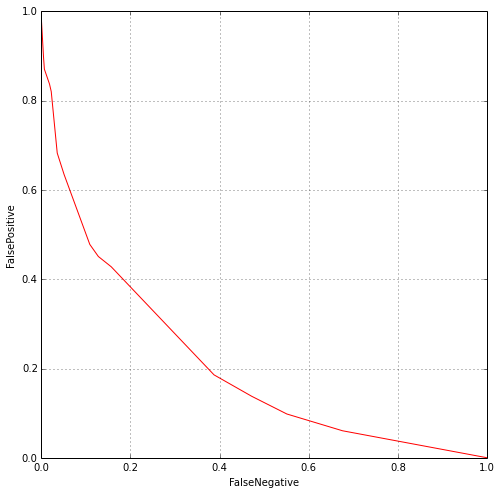

In [280]:
plt.figure(figsize=(8,8))
plt.plot(FalseNegative[0], FalsePositive[0], 'r')
plt.xlabel("FalseNegative")
plt.ylabel("FalsePositive")
plt.grid(True)

Left corner is the best due to low False Negative

# 3. Regression + Regularization <span style="color:red">100</span>

Consider the following data points.

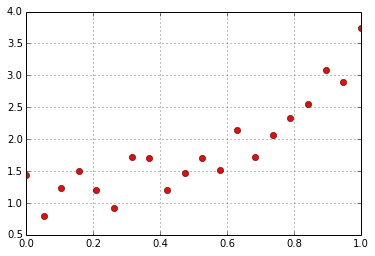

In [102]:
xs = np.array([ 0.        ,  0.05263158,  0.10526316,  0.15789474,  0.21052632,
        0.26315789,  0.31578947,  0.36842105,  0.42105263,  0.47368421,
        0.52631579,  0.57894737,  0.63157895,  0.68421053,  0.73684211,
        0.78947368,  0.84210526,  0.89473684,  0.94736842,  1.        ])

ys = np.array([ 1.43328957,  0.79286175,  1.23121202,  1.4966537 ,  1.20046242,
        0.92179229,  1.72712153,  1.70387714,  1.19614535,  1.46158381,
        1.69776375,  1.51873941,  2.14165851,  1.72157696,  2.06161889,
        2.33314082,  2.54957117,  3.07761039,  2.89394842,  3.73597637])
plt.plot(xs,ys, 'or')
plt.grid(True)

1) If we fit the following data with a straight line, 
 - Are we overfitting or underfitting? 
 - Would $E_{in}$ be high or low?
 - Would $E_{out}$ be high or low?
 
 
 <span style="color:red">15</span>

In [103]:
def guess(w, x):
    return sum(ww*x**i for i, ww in enumerate(w))

def cost(w):
    return sum((yy-guess(w, xx))**2 for xx, yy in zip(xs, ys))/len(xs)

In [104]:
w = minimize(cost, [0]*2).x
nxs = np.linspace(0., 1., 20)
nys = [guess(w, x) for x in nxs]

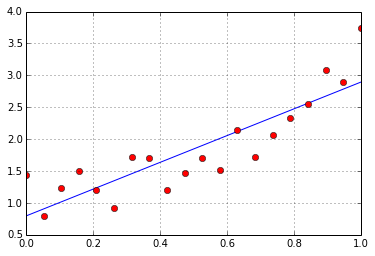

In [105]:
plt.plot(nxs,nys, 'b')
plt.plot(xs,ys, 'or')
plt.grid(True)

Seems under fitting to me hahahaha

Both $E_{in}$ and $E_{out}$ will be high

2) If we fit the following data with a polynomial of degree 20, 
 - Are we overfitting or underfitting? 
 - Would $E_{in}$ be high or low?
 - Would $E_{out}$ be high or low?
 
 <span style="color:red">15</span>

In [106]:
w = minimize(cost, [0]*20).x
nxs = np.linspace(0., 1., 20)
nys = [guess(w, x) for x in nxs]

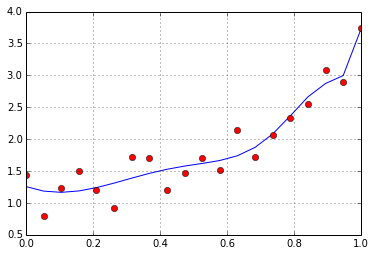

In [107]:
plt.plot(nxs,nys, 'b')
plt.plot(xs,ys, 'or')
plt.grid(True)

Looks like a little over fitting size to me

Both $E_{in}$ slightly lower compare to $E_{out}$

3) Suppose we fit it with polynomial of degree 20 with regularization term.
 - What happen if the regularization constant($\lambda$) is too large? Why?
 - What happen if the regularization constant($\lambda$) is too small? Why?
 
 <span style="color:red">15</span>

if the regularization constant($\lambda$) is too large then it would penalize the increasing the degree too much and cause the function to be underfiting

if the regularization constant($\lambda$) is too small then it would penalize the increasing the degree too little and cause the function to be overfiting


4) What should we do to pick regularization constant ($\lambda$)?

<span style="color:red">15</span>

We can plot the graph of  $E_{in}$ and  $E_{out}$ to find the right ($\lambda$), pick the one with the lowest $E_{out}$

5) Why is it that regularization term starts at $w_1$ instead of $w_0$?

<span style="color:red">15</span>

$w_0$ is just a shifting the the graph, it does not increase the complexity

6) Fit the data with polynomial of degree 20 with $\lambda=0.01$.

<span style="color:red">15</span>

In [96]:
def closeness(w, xs, ys):
    return sum((yy-guess(w, xx))**2 for xx, yy in zip(xs, ys))/len(xs)

def cost_functor(l):
    def cost(w):
        close = closeness(w, xs, ys)
        reg = l*sum(ww**2 for ww in w[1:])
        return close + reg
    return cost
cost = cost_functor(0.01)

In [97]:
w = minimize(cost, [0]*20).x
nxs = np.linspace(0., 1., 20)
nys = [guess(w, x) for x in nxs]

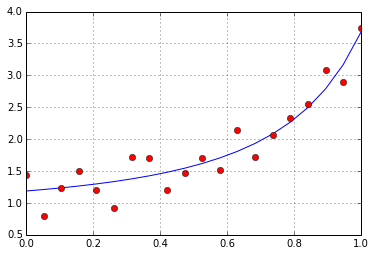

In [98]:
plt.plot(nxs,nys, 'b')
plt.plot(xs,ys, 'or')
plt.grid(True)

# 4. Logistic Regression <span style="color:red">50</span>

1) Supposed that we have 2 data points.

- Red(+1): $x_0 = 0.5$, $x_1 = 0.2$
- Blue(-1): $x_0 = 0.2$, $x_1 = 0.3$

What is the **likelihood** of getting these two data points if our hypothesis is $\vec{w_1} = [1,2,3]$

<span style="color:red">20</span> Not likelihood

In [112]:
Red = np.array([1, 0.5, 0.2])
Blue = np.array([1, 0.2, 0.3])
w = np.array([1, 2, 3])

In [113]:
def classify(w, features):
    s = np.dot(features, w)
    s = np.clip(s, -200, 200)
    return 1./(1 + np.exp(-s))

In [117]:
print classify(w, Red)
print classify(w, Blue)

0.930861579657
0.908877038985


2) What is the **likelihood** of getting these two data points if our hypothesis is $\vec{w_2} = [-1,-2,-3]$

<span style="color:red">20</span> Not likelihood

In [118]:
w = np.array([-1, -2, -3])
print classify(w, Red)
print classify(w, Blue)

0.0691384203433
0.0911229610149


3) Which $\vec{w}$ is better? Explain.

<span style="color:red">0</span> Not likelihood

They are both bad. First one saying both Red and Blue are Red, while the Second one saying both Red and Blue are Blue

# 5. One more thing <span style="color:red">100</span>

Consider the following data points. The line separating the two dataset looks something like
$$ax_0 + b \sin x_0 + cx_1 + d = 0$$

for some constants $a, b, c, d$.

Build a **logistic** classifier that performs better than 85% on the training data.

Make sure you demonstrate that your classifier works more better than 85% on training data.

**Be careful**, the classes given in the file are 0 and 1.

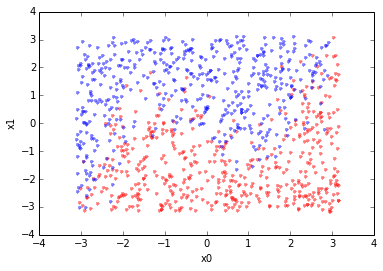

In [228]:
arr = np.genfromtxt('onemorething.csv', delimiter=',')
x0s = arr[:, 0]
x1s = arr[:, 1]
cls = arr[:, 2]
plt.plot(x0s[cls==0], x1s[cls==0], '.r', alpha=0.5)
plt.plot(x0s[cls==1], x1s[cls==1], '.b', alpha=0.5)
plt.xlabel('x0')
plt.ylabel('x1')

In [229]:
class LogisticRegression:
    def __init__(self):
        self.w = None
        
    def train(self, features, classes):
        def cost(w):
            s = np.dot(features, w)
            s = np.clip(s, -200, 200)
            return np.sum(np.log1p(np.exp(-classes*s)))
        self.w = minimize(cost, [0.]*len(features[0])).x
        
    def classify(self, features):
        s = np.dot(features, self.w)
        s = np.clip(s, -200, 200)
        return 1./(1 + np.exp(-s))

In [230]:
def padAndCombined(datax, datay):
    data = np.zeros((len(datax),4))
    data[:, 0] = 1.
    data[:, 1] = datax
    data[:, 2] = datay
    data[:, 3] = np.sin(datax)
    return data

In [231]:
classes = np.array([ 1 if c == 1 else -1 for c in cls])

In [238]:
features = padAndCombined(x0s, x1s)
LR = LogisticRegression()
LR.train(features, classes)

In [239]:
right = 0.

for idx in xrange(len(classes)):
    prob = LR.classify(features[idx])
    if prob >= 0.5 and classes[idx] == 1:
        right += 1
    elif prob < 0.5 and classes[idx] == -1:
        right += 1
print "Correctness: {0:.2f}%".format(right/len(classes))

Correctness: 0.89%


In [240]:
def calYs(w, p, xs):
    c, m, k, j = w
    
    rh = -np.log((1./p) - 1.)
    
    ys = []
    for x in xs:
        ys.append((c + m*x + j*np.sin(x) + rh)/(-k))
        
    return np.array(ys)

In [246]:
xs = np.linspace(-3, 3, len(data))
ys = calYs(LR.w, 0.5, xs)

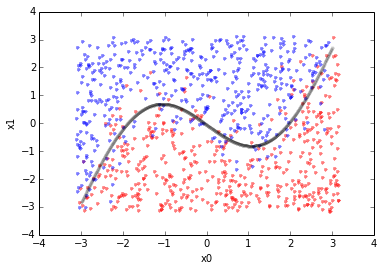

In [258]:
plt.plot(x0s[cls==0], x1s[cls==0], '.r', alpha=0.5)
plt.plot(x0s[cls==1], x1s[cls==1], '.b', alpha=0.5)
plt.plot(xs, ys, '.k', alpha=0.08)
plt.xlabel('x0')
plt.ylabel('x1')